In [3]:
# source: https://www.kaggle.com/ntnu-testimon/paysim1
import os
import pandas as pd
import numpy as np

df = pd.read_csv("PS_20174392719_1491204439457_log.csv", na_values=['NA', '?'])
df.reindex(np.random.permutation(df.index))
small=df.head(10000)


In [16]:
small.shape

(10000, 11)

In [4]:
small.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
small.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.0
mean,4.178900,1.035467e+05,8.939330e+05,9.152741e+05,9.342758e+05,1.096606e+06,0.006800,0.0
std,2.479821,2.663072e+05,2.135683e+06,2.181428e+06,2.676340e+06,3.014496e+06,0.082185,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.397530e+03,1.276875e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.285874e+04,2.137556e+04,1.034994e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.143825e+05,1.782719e+05,1.760934e+05,2.831067e+05,2.520552e+05,0.000000,0.0
max,7.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [6]:
print(small.isnull().values.any())


False


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(small['type'])
encoded_type = encoder.transform(small['type'])
encoded_type

array([3, 3, 4, ..., 3, 4, 3])

In [14]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)


{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


In [22]:
small.insert(1,"encoded_type",encoded_type)
small[:5]

,step,encoded_type,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


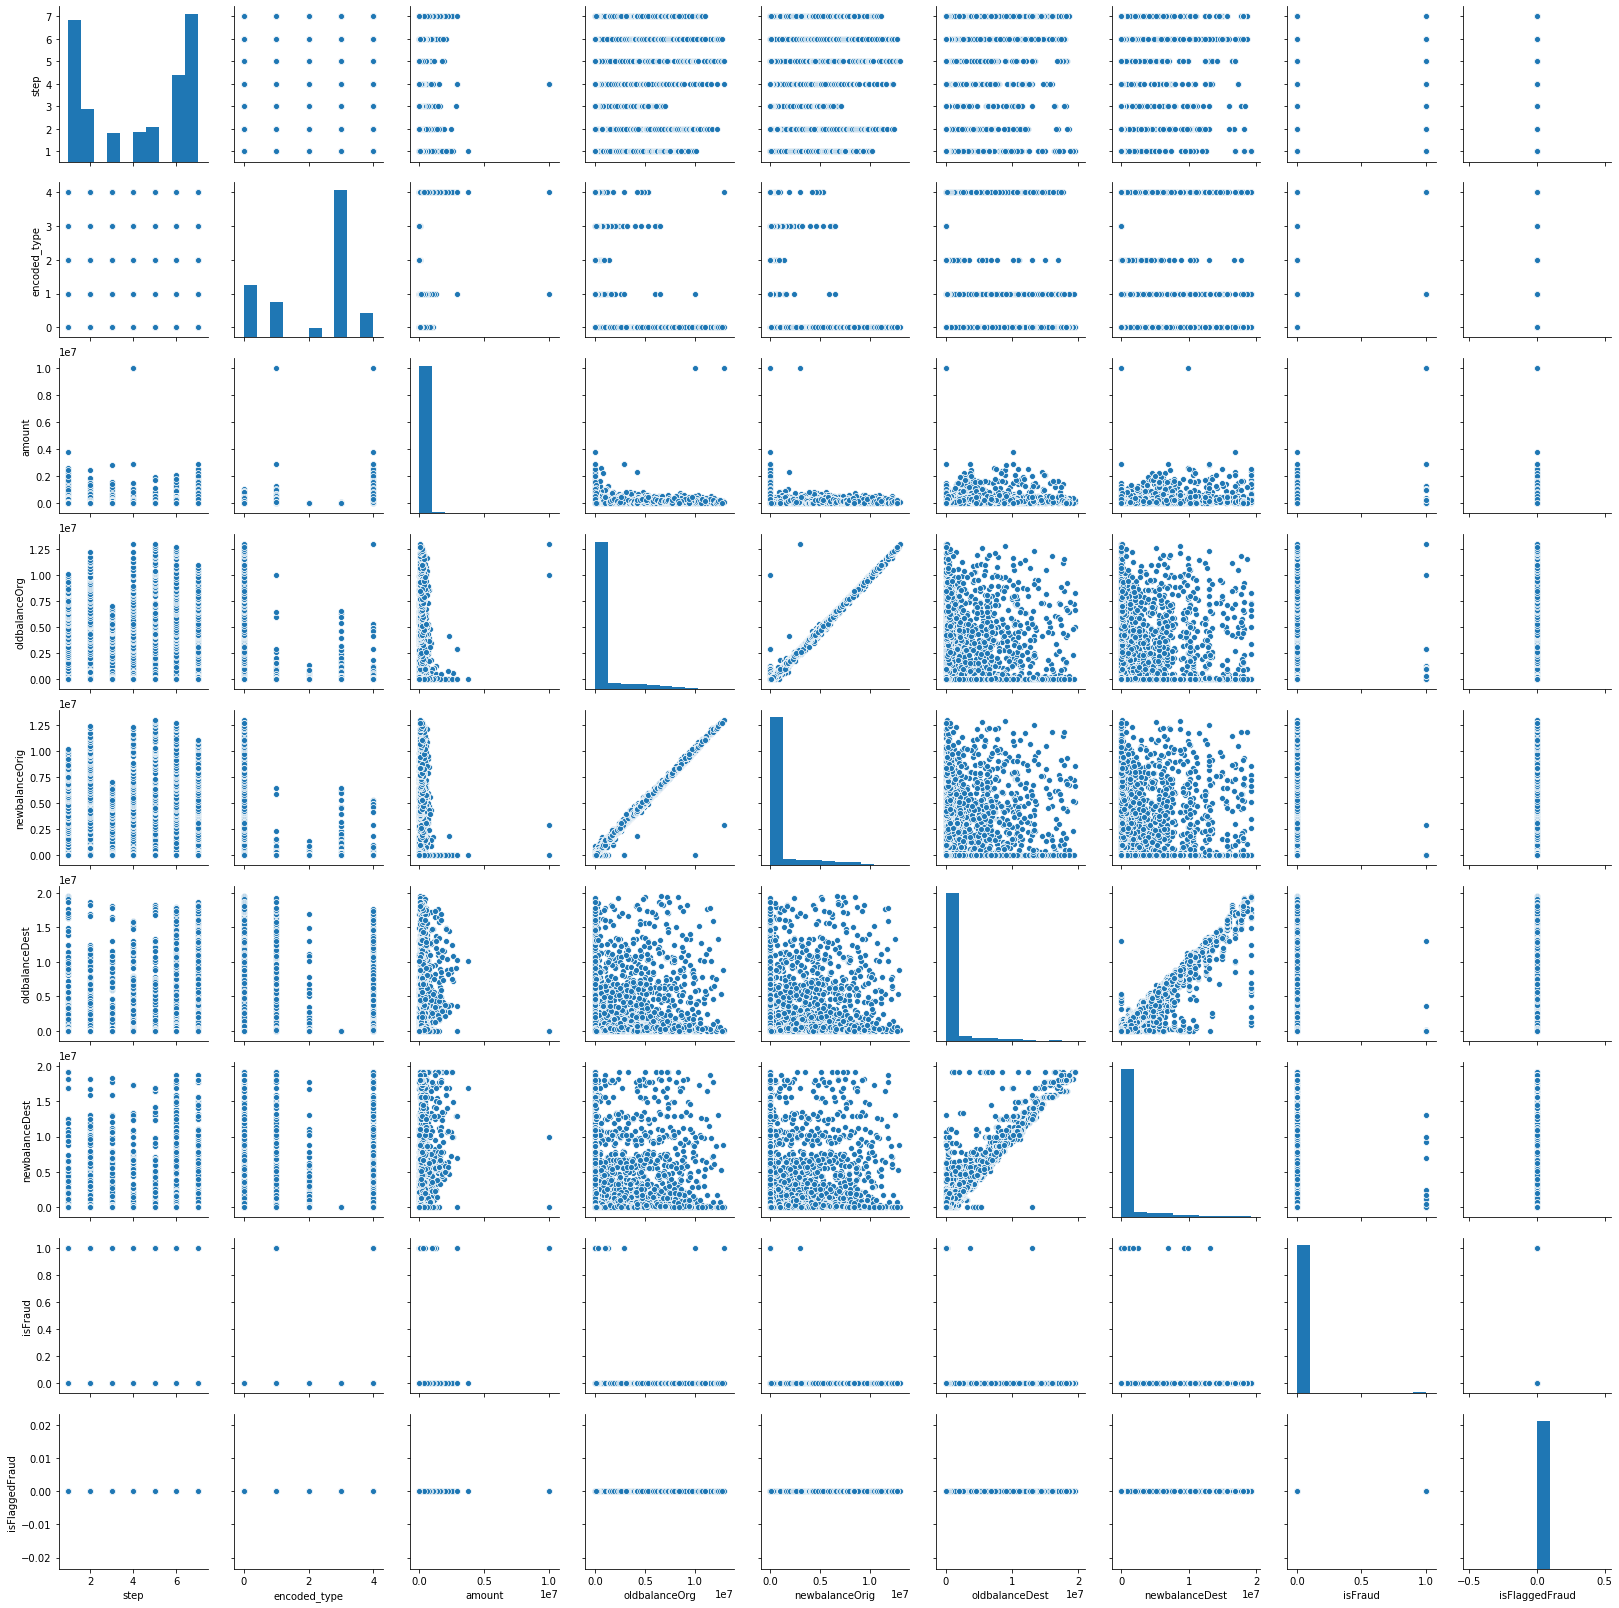

In [23]:
import seaborn as sns
sns.pairplot(small)

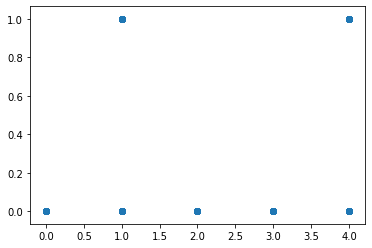

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(small_enc["encoded_type"], small_enc["isFraud"])

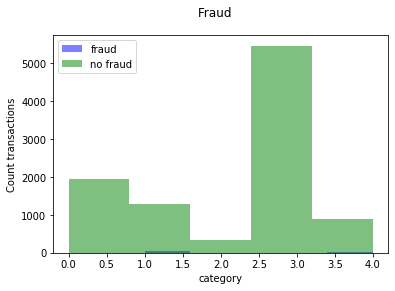

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(small_enc[small_enc["isFraud"]==1]["encoded_type"], bins=5, alpha=0.5, color="blue", label="fraud")
ax.hist(small_enc[small_enc["isFraud"]==0]["encoded_type"], bins=5, alpha=0.5, color="green", label="no fraud")

ax.set_xlabel("category")
ax.set_ylabel("Count transactions")

fig.suptitle("Fraud")

ax.legend();

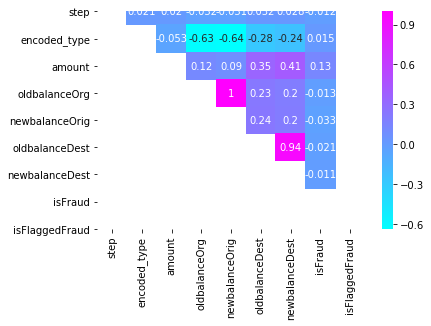

In [24]:
mask = np.tril(small.corr())
sns.heatmap(small.corr(), annot = True, cmap= 'cool', mask=mask)


In [31]:
mask = np.tril(small.corr())
sns.heatmap(small.corr(small["isFraud"],small["encoded_type"]), annot = True, cmap= 'cool', mask=mask)


/Users/sabinaadamska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
columnsToEncode=small.select_dtypes(include=[object]).columns
small_enc = pd.get_dummies(small, columns=columnsToEncode, drop_first=True)
small_enc[:5]
small

,step,encoded_type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,...,nameDest_M996533593,nameDest_M997294994,nameDest_M997919131,nameDest_M99808631,nameDest_M998283025,nameDest_M998458782,nameDest_M998935228,nameDest_M998983750,nameDest_M999036382,nameDest_M999221400
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
seriesObj = small.apply(lambda x: True if x['isFraud'] == 1 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of Rows in dataframe in which Age > 30 : ', numOfRows)

Number of Rows in dataframe in which Age > 30 :  68


https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

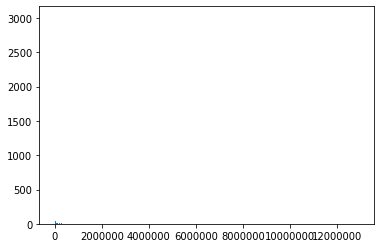

In [44]:
import matplotlib.pyplot as plt

plt.hist(small['oldbalanceOrg'], bins=10000)
#plt.xlim(0, 20000)
#plt.ylim(0,5000)
plt.ticklabel_format(style='plain')
plt.show()

In [43]:
print(small.type.value_counts())


PAYMENT     5465
CASH_IN     1949
CASH_OUT    1321
TRANSFER     921
DEBIT        344
Name: type, dtype: int64


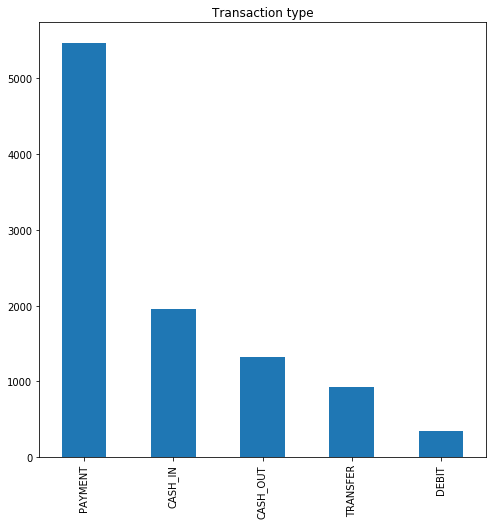

AxesSubplot(0.125,0.125;0.775x0.755)


In [59]:
f, ax = plt.subplots(1, 1)
small.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()
print(ax)

https://www.kdnuggets.com/2020/07/exploratory-data-analysis-steroids.html

NameError: name 'small' is not defined

## TF tutorial 
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [34]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [47]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(df['type'])
enc_type = enc.transform(df['type'])
df.insert(1,"encoded_type",enc_type)


df.describe()

,step,encoded_type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [46]:
df.pop('type')
df.pop('isFlaggedFraud')
df[:5]

,step,encoded_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [68]:
enc.fit(df['nameOrig'])
enc_nameOrig = enc.transform(df['nameOrig'])
df.insert(3,"encoded_nameOrig",enc_nameOrig)

df.pop('nameOrig')
df[:5]


,step,encoded_type,amount,encoded_nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,757869,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,5828262,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,3445981,41554.0,29885.86,M1230701703,0.0,0.0,0


In [70]:
enc.fit(df['nameDest'])
enc_nameDest = enc.transform(df['nameDest'])
df.insert(6,"encoded_nameDest",enc_nameDest)

df.pop('nameDest')
df[:5]


,step,encoded_type,amount,encoded_nameOrig,oldbalanceOrg,newbalanceOrig,encoded_nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


In [33]:
## https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

neg, pos = np.bincount(df['isFraud'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 6362620
    Positive: 8213 (0.13% of total)



In [ ]:
cleaned_df = df.copy()

# lemme se if step column helps
# cleaned_df.pop('step')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('amount')+eps)

In [71]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.array(df.iloc[:,:8])
y = np.array(df.iloc[:,9])
x[:5]


array([[1.0000000e+00, 3.0000000e+00, 9.8396400e+03, 7.5786900e+05,
        1.7013600e+05, 1.6029636e+05, 1.6620940e+06, 0.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 1.8642800e+03, 2.1889980e+06,
        2.1249000e+04, 1.9384720e+04, 1.7339240e+06, 0.0000000e+00],
       [1.0000000e+00, 4.0000000e+00, 1.8100000e+02, 1.0021560e+06,
        1.8100000e+02, 0.0000000e+00, 4.3968500e+05, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.8100000e+02, 5.8282620e+06,
        1.8100000e+02, 0.0000000e+00, 3.9169600e+05, 2.1182000e+04],
       [1.0000000e+00, 3.0000000e+00, 1.1668140e+04, 3.4459810e+06,
        4.1554000e+04, 2.9885860e+04, 8.2891900e+05, 0.0000000e+00]])

In [72]:
y[:5]

array([0, 0, 1, 1, 0])

In [73]:
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y).astype(np.float32)
encoded_y[:15]

# convert integers to dummy variables (i.e. one hot encoded)
one_hot = np_utils.to_categorical(encoded_y)
one_hot[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,one_hot,test_size=0.25,random_state=42)


In [75]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
 #You might try varying the activation function, and/or the number of hidden units
model.add(Dense(128, input_dim=x.shape[1], activation='sigmoid'))
 #you might experiment with a second hidden layer
 #model.add(Dense(20, activation='sigmoid'))
model.add(Dense(one_hot.shape[1],activation='softmax'))

In [76]:
one_hot.shape

(6362620, 2)

In [78]:
#compile the model setting the loss (error) measure and the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam')
#Fir the model, you might change the number of epochs training is run for.
model.fit(X_train,y_train,verbose=2,epochs=1)



Epoch 1/1
 - 156s - loss: 0.0096


In [81]:
#make predictions (will give a probability distribution)
pred = model.predict(X_test) 
#now pick the most likely outcome
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1) 




In [82]:
from sklearn import metrics
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9988489018674697
